## 作業

### 資料讀取

In [80]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv',index_col=0)

In [81]:
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


### 資料清理

In [82]:
df['city'] = df['address'].str.extract('(.+?[市縣])')

In [83]:
df['address'].map(lambda e: e[0:3])

0        高雄市
1        新北市
2        新北市
3        屏東縣
4        桃園市
        ... 
70310    新竹市
70311    高雄市
70312    台中市
70313    高雄市
70314    台北市
Name: address, Length: 70315, dtype: object

In [84]:
p = '11,000元/月'
def normalizePrice(s):
  return int(s.replace('元/月','').replace(',',''))
normalizePrice(p)

11000

In [85]:
df['price']= df['price'].map(normalizePrice)

### 連接資料庫

In [88]:
import sqlite3 
with sqlite3.connect('591data,sqlite') as db:
  df.to_sql('rent591', con = db, if_exists='replace')

In [107]:
import sqlite3 
with sqlite3.connect('591data,sqlite') as db:
  stat = pd.read_sql_query('select city, building_area, price from rent591', con = db)
stat['city'].value_counts()

台北市    17168
台中市    11754
新北市    11630
桃園市     8016
高雄市     6902
台南市     3964
新竹市     3337
新竹縣     2565
苗栗縣      840
彰化縣      775
基隆市      624
宜蘭縣      617
嘉義市      473
屏東縣      392
花蓮縣      357
雲林縣      319
南投縣      194
嘉義縣      188
台東縣      129
金門縣       66
澎湖縣        5
Name: city, dtype: int64

In [108]:
import sqlite3 
with sqlite3.connect('591data,sqlite') as db:
  stat = pd.read_sql_query('select city, count(*) as cnt from rent591 group by city order by cnt desc', con = db)
stat

,city,cnt
0,台北市,17168
1,台中市,11754
2,新北市,11630
3,桃園市,8016
4,高雄市,6902
5,台南市,3964
6,新竹市,3337
7,新竹縣,2565
8,苗栗縣,840
9,彰化縣,775


### 資料視覺化

In [91]:
! wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

--2020-10-17 02:20:58--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c07::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip.1’

NotoSansCJKtc-hinte 100%[===================>] 115.63M   141MB/s    in 0.8s    

2020-10-17 02:20:59 (141 MB/s) - ‘NotoSansCJKtc-hinted.zip.1’ saved [121247366/121247366]



In [92]:
! unzip NotoSansCJKtc-hinted.zip

Archive:  NotoSansCJKtc-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


In [109]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = './NotoSansCJKtc-Regular.otf'
fontprop = fm.FontProperties(fname=path)

In [110]:
stat.set_index('city',inplace=True)

In [111]:
stat

,cnt
city,
台北市,17168
台中市,11754
新北市,11630
桃園市,8016
高雄市,6902
台南市,3964
新竹市,3337
新竹縣,2565
苗栗縣,840


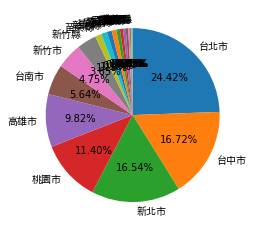

In [112]:
patches,l_text,p_text = plt.pie(stat['cnt'], labels=stat.index, autopct="%1.2f%%", startangle = 90, counterclock=False)
for t in l_text: 
	t.set_fontproperties(fontprop)



In [113]:
#stat.iloc[0:5,:]
stat.iloc[5:,:].sum()['cnt']

14845

In [114]:
others = pd.DataFrame([{'cnt': stat.iloc[5:,:].sum()['cnt']}])
others = others.rename(index={0: '其他'})
others

,cnt
其他,14845


In [115]:
stat2 = pd.concat([stat.iloc[0:5,:], others])
stat2

,cnt
台北市,17168
台中市,11754
新北市,11630
桃園市,8016
高雄市,6902
其他,14845


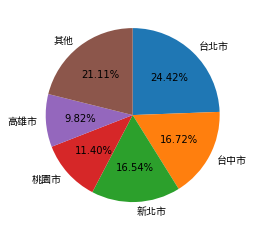

In [116]:
patches,l_text,p_text = plt.pie(stat2['cnt'], labels=stat2.index, autopct="%1.2f%%", startangle = 90, counterclock=False)
for t in l_text: 
	t.set_fontproperties(fontprop)



([<matplotlib.axis.XTick at 0x7f4bb6ae26d8>,
 [Text(0, 0, '台北市'),
  Text(0, 0, '台中市'),
  Text(0, 0, '新北市'),
  Text(0, 0, '桃園市'),
  Text(0, 0, '高雄市'),
  Text(0, 0, '台南市'),
  Text(0, 0, '新竹市'),
  Text(0, 0, '新竹縣'),
  Text(0, 0, '苗栗縣'),
  Text(0, 0, '彰化縣'),
  Text(0, 0, '基隆市'),
  Text(0, 0, '宜蘭縣'),
  Text(0, 0, '嘉義市'),
  Text(0, 0, '屏東縣'),
  Text(0, 0, '花蓮縣'),
  Text(0, 0, '雲林縣'),
  Text(0, 0, '南投縣'),
  Text(0, 0, '嘉義縣'),
  Text(0, 0, '台東縣'),
  Text(0, 0, '金門縣'),
  Text(0, 0, '澎湖縣')])

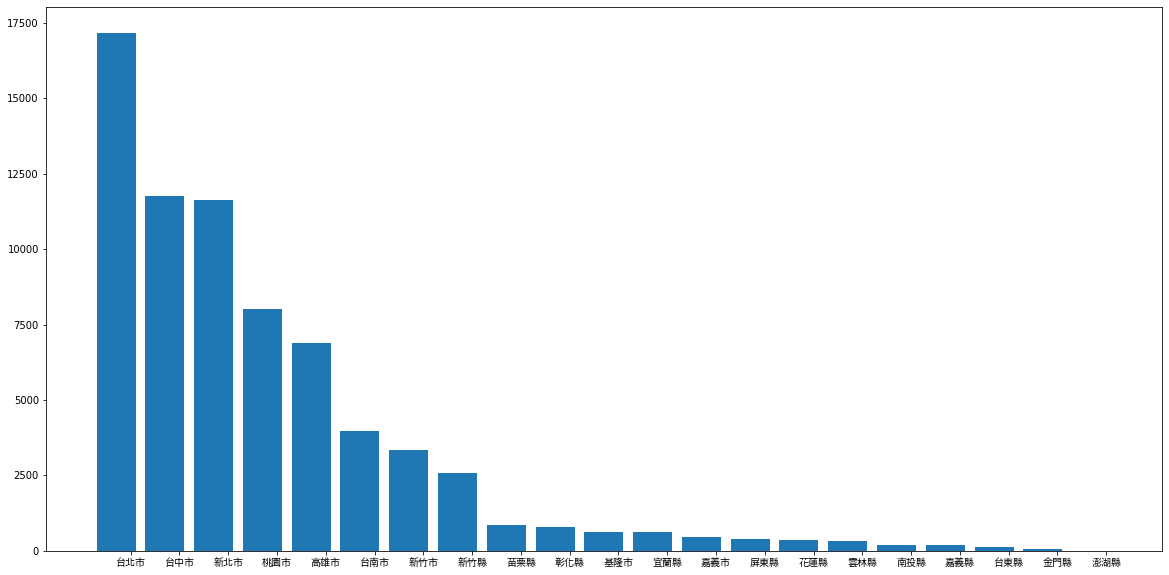

In [117]:
#plt.figure(size = [10,5])
plt.figure(figsize=(20,10))
plt.bar(height = stat['cnt'], x=stat.index)
width = 0.3
x = range(len(stat.index))
plt.xticks([i+width for i in x],stat.index, fontproperties=fontprop)

In [118]:
import sqlite3 
with sqlite3.connect('591data,sqlite') as db:
  stat = pd.read_sql_query('select city, building_area, price from rent591', con = db)
stat['unit_price'] = stat['price'] / stat['building_area']

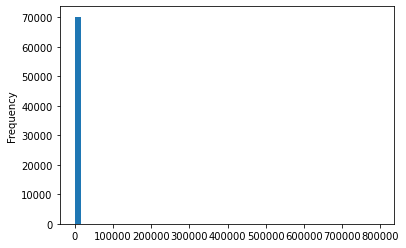

In [121]:
stat['unit_price'].plot(kind = 'hist', bins = 50)

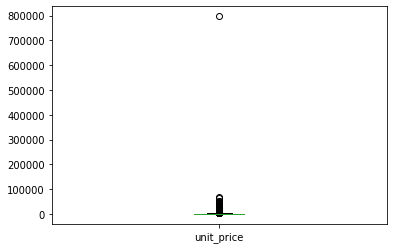

In [122]:
stat['unit_price'].plot(kind = 'box')

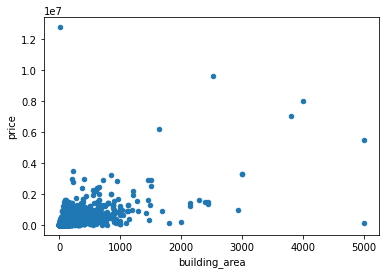

In [124]:
stat = stat[stat['building_area'] < 10000]
stat.plot(kind = 'scatter', x = 'building_area', y = 'price')

### Plotly

In [125]:
import sqlite3 
with sqlite3.connect('591data,sqlite') as db:
  stat = pd.read_sql_query('select city, count(*) as cnt from rent591 group by city order by cnt desc', con = db)
stat

,city,cnt
0,台北市,17168
1,台中市,11754
2,新北市,11630
3,桃園市,8016
4,高雄市,6902
5,台南市,3964
6,新竹市,3337
7,新竹縣,2565
8,苗栗縣,840
9,彰化縣,775


In [126]:
import plotly.express as px

fig = px.pie(stat, values='cnt', names='city', title='City Count')
fig.show()

In [128]:
import plotly.express as px

fig = px.bar(stat, y='cnt', x='city', title='City Count')
fig.show()

In [129]:
import sqlite3 
with sqlite3.connect('591data,sqlite') as db:
  data = pd.read_sql_query('select city, price, building_area from rent591', con = db)
data

,city,price,building_area
0,高雄市,4500,6.0
1,新北市,7500,10.0
2,新北市,11000,8.0
3,屏東縣,5000,8.0
4,桃園市,5000,7.0
...,...,...,...
70310,新竹市,13500,8.0
70311,高雄市,8800,19.0
70312,台中市,5999,6.0
70313,高雄市,3300,5.0


In [136]:
import plotly.express as px

fig = px.histogram(data, x = 'price', title='City Count', log_y=True)
fig.show()

In [134]:
import plotly.express as px

fig = px.box(data, y = 'price', title='City Count', log_y=True)
fig.show()

In [137]:
import plotly.express as px

fig = px.scatter(data, x = 'building_area', y = 'price', title='City Count')
fig.show()

## 5G 購機方案

In [218]:
import pandas
dfs = pandas.read_html('https://iphone-eshop.cdn.hinet.net/Next.html')

In [220]:
#dfs[0]

In [221]:
df = dfs[0]

In [222]:
df.head()

,月繳金額,月繳金額.1,月繳金額.2,$599,$799,$999,$1199,"$1,399","$1,599","$1,799","$2,699"
0,購機優惠價(元),48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月
1,購機優惠價(元),iPhone 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,購機優惠價(元),iPhone 12,64GB,-,-,13300,10800,2300,300,0,0
3,購機優惠價(元),iPhone 12,128GB,-,-,14900,12400,3900,1900,0,0
4,購機優惠價(元),iPhone 12,256GB,-,-,18400,15900,7400,5400,400,0


In [223]:
df.dropna(inplace=True)

In [224]:
df.head()

,月繳金額,月繳金額.1,月繳金額.2,$599,$799,$999,$1199,"$1,399","$1,599","$1,799","$2,699"
0,購機優惠價(元),48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月
2,購機優惠價(元),iPhone 12,64GB,-,-,13300,10800,2300,300,0,0
3,購機優惠價(元),iPhone 12,128GB,-,-,14900,12400,3900,1900,0,0
4,購機優惠價(元),iPhone 12,256GB,-,-,18400,15900,7400,5400,400,0
6,購機優惠價(元),iPhone 12 Pro,128GB,-,-,20300,17800,9300,7300,2300,0


In [225]:
df['month'] = df['月繳金額.1'].str.extract('(\d+)個月')

In [226]:
df.head()

,月繳金額,月繳金額.1,月繳金額.2,$599,$799,$999,$1199,"$1,399","$1,599","$1,799","$2,699",month
0,購機優惠價(元),48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月,48
2,購機優惠價(元),iPhone 12,64GB,-,-,13300,10800,2300,300,0,0,NaN
3,購機優惠價(元),iPhone 12,128GB,-,-,14900,12400,3900,1900,0,0,NaN
4,購機優惠價(元),iPhone 12,256GB,-,-,18400,15900,7400,5400,400,0,NaN
6,購機優惠價(元),iPhone 12 Pro,128GB,-,-,20300,17800,9300,7300,2300,0,NaN


In [227]:
df['month'].ffill(inplace=True)

In [228]:
df.head()

,月繳金額,月繳金額.1,月繳金額.2,$599,$799,$999,$1199,"$1,399","$1,599","$1,799","$2,699",month
0,購機優惠價(元),48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月,48個月,48
2,購機優惠價(元),iPhone 12,64GB,-,-,13300,10800,2300,300,0,0,48
3,購機優惠價(元),iPhone 12,128GB,-,-,14900,12400,3900,1900,0,0,48
4,購機優惠價(元),iPhone 12,256GB,-,-,18400,15900,7400,5400,400,0,48
6,購機優惠價(元),iPhone 12 Pro,128GB,-,-,20300,17800,9300,7300,2300,0,48


In [229]:
df2 = df[~df['月繳金額.1'].str.contains('個月')]

In [230]:
df2.head()

,月繳金額,月繳金額.1,月繳金額.2,$599,$799,$999,$1199,"$1,399","$1,599","$1,799","$2,699",month
2,購機優惠價(元),iPhone 12,64GB,-,-,13300,10800,2300,300,0,0,48
3,購機優惠價(元),iPhone 12,128GB,-,-,14900,12400,3900,1900,0,0,48
4,購機優惠價(元),iPhone 12,256GB,-,-,18400,15900,7400,5400,400,0,48
6,購機優惠價(元),iPhone 12 Pro,128GB,-,-,20300,17800,9300,7300,2300,0,48
7,購機優惠價(元),iPhone 12 Pro,256GB,-,-,23800,21300,12800,10800,5800,0,48


In [231]:
df2.columns

Index(['月繳金額', '月繳金額.1', '月繳金額.2', '$599', '$799', '$999', '$1199', '$1,399',
       '$1,599', '$1,799', '$2,699', 'month'],
      dtype='object')

In [232]:
df2.columns = ['優惠價', '機種', '容量', '$599', '$799', '$999', '$1199', '$1,399',
       '$1,599', '$1,799', '$2,699', 'month']

In [233]:
df2.head()

,優惠價,機種,容量,$599,$799,$999,$1199,"$1,399","$1,599","$1,799","$2,699",month
2,購機優惠價(元),iPhone 12,64GB,-,-,13300,10800,2300,300,0,0,48
3,購機優惠價(元),iPhone 12,128GB,-,-,14900,12400,3900,1900,0,0,48
4,購機優惠價(元),iPhone 12,256GB,-,-,18400,15900,7400,5400,400,0,48
6,購機優惠價(元),iPhone 12 Pro,128GB,-,-,20300,17800,9300,7300,2300,0,48
7,購機優惠價(元),iPhone 12 Pro,256GB,-,-,23800,21300,12800,10800,5800,0,48


In [234]:
p = pd.wide_to_long(df2, ["$"], i=['優惠價', '機種', '容量', 'month'], j="monthly_price",suffix = '[\d,]+')

In [235]:
p.head()

$
優惠價      機種        容量   month monthly_price       
購機優惠價(元) iPhone 12 64GB 48    599                -
                              799                -
                              999            13300
                              1199           10800
                              1,399           2300

In [238]:
p = p.reset_index()

In [240]:
ret_df = p[~(p['$'] == '-')]
ret_df['month'] = ret_df['month'].astype(int)
ret_df['monthly_price'] = ret_df['monthly_price'].map(lambda e: int(e.replace(',','')))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [243]:
ret_df['$'] = ret_df['$'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [244]:
ret_df['total_price'] = ret_df['month'] * ret_df['monthly_price'] + ret_df['$']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [247]:
26900 + 24 * 500

38900

In [246]:
ret_df.sort_values('total_price')

,優惠價,機種,容量,month,monthly_price,$,total_price
144,購機優惠價(元),iPhone 12,64GB,24,599,22300,36676
152,購機優惠價(元),iPhone 12,128GB,24,599,23900,38276
96,購機優惠價(元),iPhone 12,64GB,30,599,21300,39270
145,購機優惠價(元),iPhone 12,64GB,24,799,21300,40476
104,購機優惠價(元),iPhone 12,128GB,30,599,22900,40870
...,...,...,...,...,...,...,...
31,購機優惠價(元),iPhone 12 Pro,128GB,48,2699,0,129552
7,購機優惠價(元),iPhone 12,64GB,48,2699,0,129552
39,購機優惠價(元),iPhone 12 Pro,256GB,48,2699,0,129552
15,購機優惠價(元),iPhone 12,128GB,48,2699,0,129552


## 線性迴歸

In [168]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)

In [169]:
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


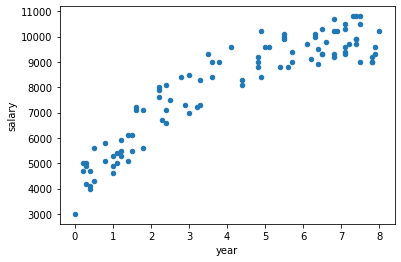

In [170]:
df.plot(kind ='scatter', x= 'year', y = 'salary')

Text(0, 0.5, 'salary')

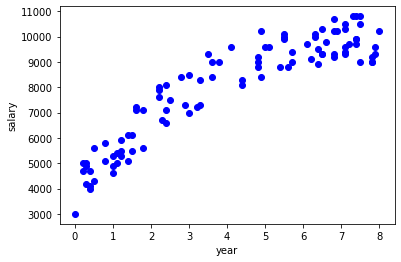

In [172]:
from matplotlib import pyplot as plt
plt.scatter(df['year'], df['salary'], color = 'blue')
plt.xlabel('year')
plt.ylabel('salary')

In [173]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [175]:
regr.fit(df[['year']], df['salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y = ax + b

salary = year * a + b

a = 712.59

b = 5049

In [176]:
regr.coef_

array([712.59413615])

In [177]:
regr.intercept_

5049.0098998138365

In [178]:
import numpy as np
year_data = np.array([[3],[5],[7]])
regr.predict(year_data)

array([ 7186.79230825,  8611.98058054, 10037.16885283])

Text(0, 0.5, 'salary')

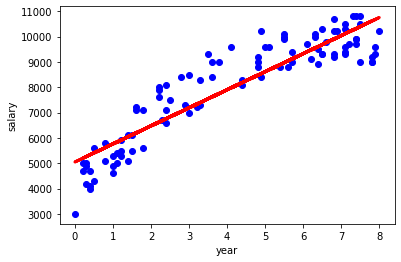

In [181]:
from matplotlib import pyplot as plt
plt.scatter(df['year'], df['salary'], color = 'blue')
plt.plot(df['year'], regr.predict(df[['year']]), color = 'red', linewidth = 3)
plt.xlabel('year')
plt.ylabel('salary')

In [182]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=2) # ax^ 2 + bx + c
X = df[['year']]
Y = df['salary']
X_ = poly_reg.fit_transform(X)
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
regr.coef_

array([   0.        , 1681.21265549, -119.70527702])

In [184]:
regr.intercept_

3896.8009311708356

In [188]:
new_X = poly_reg.transform(np.array([[1]]))

In [189]:
regr.predict(new_X)

array([5458.30830965])

In [193]:
X2 = X.sort_values(['year'])
X2_ = poly_reg.transform(X2)


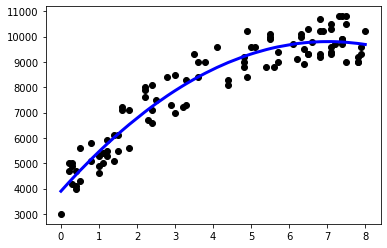

In [194]:
plt.scatter(X, Y, color='black')
plt.plot(X2, regr.predict(X2_), linewidth = 3, color="blue")
plt.show()

## 多元迴歸模型

In [248]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/house-prices.csv')

- 結構化資料

- 需要所有的資料都為數值

- 不能有缺失值

In [250]:
type(df)

pandas.core.frame.DataFrame

In [251]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [254]:
df['Brick'].unique()

array(['No', 'Yes'], dtype=object)

In [258]:
brick = pandas.get_dummies(df['Brick'])
df2 = pandas.concat([df, brick], axis = 1)
del df2['Brick']
del df2['No']

In [259]:
df2.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Yes
0,1,114300,1790,2,2,2,East,0
1,2,114200,2030,4,2,3,East,0
2,3,114800,1740,3,2,1,East,0
3,4,94700,1980,3,2,3,East,0
4,5,119800,2130,3,3,3,East,0


In [260]:
df['Neighborhood'].unique()

array(['East', 'North', 'West'], dtype=object)

In [262]:
neighborhood = pandas.get_dummies(df['Neighborhood'])

In [263]:
df3 = pandas.concat([df2, neighborhood], axis = 1)

In [265]:
del df3['West']
del df3['Neighborhood']

In [267]:
del df3['Home']

In [268]:
df3.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [269]:
Y = df3['Price']
X = df3.iloc[:,1:]

In [272]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [274]:
X.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'], dtype='object')

In [273]:
regr.coef_

array([    52.99374081,   4246.79389165,   7883.27849293,  -8267.48831831,
        17297.34952752, -22241.61647014, -20681.03735068])

In [276]:
#regr.predict(X)

In [278]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           8.25e-50
Time:                        06:14:15   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

In [279]:
pred_Y = regr.predict(X)

In [280]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(Y, pred_Y)

94105539.9460302

In [281]:
r2_score(Y,pred_Y)

0.8686210289688724

In [283]:
X.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'], dtype='object')

In [289]:
import itertools
list(itertools.combinations(X.columns, 5))

[('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes'),
 ('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'East'),
 ('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'North'),
 ('SqFt', 'Bedrooms', 'Bathrooms', 'Yes', 'East'),
 ('SqFt', 'Bedrooms', 'Bathrooms', 'Yes', 'North'),
 ('SqFt', 'Bedrooms', 'Bathrooms', 'East', 'North'),
 ('SqFt', 'Bedrooms', 'Offers', 'Yes', 'East'),
 ('SqFt', 'Bedrooms', 'Offers', 'Yes', 'North'),
 ('SqFt', 'Bedrooms', 'Offers', 'East', 'North'),
 ('SqFt', 'Bedrooms', 'Yes', 'East', 'North'),
 ('SqFt', 'Bathrooms', 'Offers', 'Yes', 'East'),
 ('SqFt', 'Bathrooms', 'Offers', 'Yes', 'North'),
 ('SqFt', 'Bathrooms', 'Offers', 'East', 'North'),
 ('SqFt', 'Bathrooms', 'Yes', 'East', 'North'),
 ('SqFt', 'Offers', 'Yes', 'East', 'North'),
 ('Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East'),
 ('Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'North'),
 ('Bedrooms', 'Bathrooms', 'Offers', 'East', 'North'),
 ('Bedrooms', 'Bathrooms', 'Yes', 'East', 'North'),
 ('Bedrooms', 'Offers', 'Yes', 

In [290]:
predictorcols = list(X.columns)

In [291]:
import itertools
AICs = {}
for k in range(1,len(predictorcols)+1):
  for variables in itertools.combinations(predictorcols, k):
    predictors = X[list(variables)]
    predictors2 = sm.add_constant(predictors)
    est = sm.OLS(Y, predictors2)
    res = est.fit()
    AICs[variables] = res.aic

In [293]:
from collections import Counter
c = Counter(AICs)
c.most_common()[::-10]

[(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
  2729.318981401249),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes'), 2789.5148143560264),
 (('SqFt', 'Offers', 'East', 'North'), 2805.929045591597),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'East', 'North'), 2827.1498026886024),
 (('Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East'), 2837.9283737790706),
 (('Bedrooms', 'Bathrooms', 'Offers', 'Yes'), 2845.973295559599),
 (('SqFt', 'Offers'), 2865.6942475349356),
 (('Bedrooms', 'Bathrooms', 'Offers', 'East'), 2874.0450207228523),
 (('Bedrooms', 'Bathrooms', 'Yes'), 2883.9535408052025),
 (('SqFt', 'Yes'), 2896.9093592727936),
 (('Bedrooms', 'North'), 2908.6992372764653),
 (('Bedrooms', 'Bathrooms'), 2916.035689947397),
 (('Bathrooms',), 2936.1658574541634)]

## 591 房價預測

In [297]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', index_col = 0)

In [300]:
df.isna().sum()

id               0
address          0
floor            0
allfloor         0
layout           0
area             0
price            0
browsenum_all    0
dtype: int64

In [303]:
df = df.iloc[:,2:]

In [304]:
df.head()

,floor,allfloor,layout,area,price,browsenum_all
0,5,5,5房3廳3衛,46.8,"60,000",751
1,7,12,4房2廳2衛,76.9,"100,000",162
2,10,13,4房2廳2衛,71.3,"150,000",2385
3,3,4,2房1廳1衛,18.0,"29,000",1323
4,5,5,2房2廳1衛,28.0,"31,800",2303


In [305]:
df['price'] = df['price'].map(lambda e: int(e.replace(',','')))

In [306]:
df.head()

,floor,allfloor,layout,area,price,browsenum_all
0,5,5,5房3廳3衛,46.8,60000,751
1,7,12,4房2廳2衛,76.9,100000,162
2,10,13,4房2廳2衛,71.3,150000,2385
3,3,4,2房1廳1衛,18.0,29000,1323
4,5,5,2房2廳1衛,28.0,31800,2303


In [307]:
df[['bedroom','livingroom','bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

In [309]:
df.dropna(inplace=True)

In [310]:
df['bedroom'] = df['bedroom'].astype(int)
df['livingroom'] = df['livingroom'].astype(int)
df['bathroom'] = df['bathroom'].astype(int)

In [312]:
del df['layout']

In [313]:
df.head()

,floor,allfloor,area,price,browsenum_all,bedroom,livingroom,bathroom
0,5,5,46.8,60000,751,5,3,3
1,7,12,76.9,100000,162,4,2,2
2,10,13,71.3,150000,2385,4,2,2
3,3,4,18.0,29000,1323,2,1,1
4,5,5,28.0,31800,2303,2,2,1


In [314]:
df.columns

Index(['floor', 'allfloor', 'area', 'price', 'browsenum_all', 'bedroom',
       'livingroom', 'bathroom'],
      dtype='object')

In [320]:
Y = df['price']
X = df[['floor', 'area', 'browsenum_all', 'bedroom',
        'bathroom']]

In [321]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [322]:
pred_Y = regr.predict(X)

In [323]:
from sklearn.metrics import r2_score
r2_score(Y, pred_Y)

0.698625934443261

In [324]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     327.3
Date:                Sat, 17 Oct 2020   Prob (F-statistic):          3.91e-181
Time:                        06:52:08   Log-Likelihood:                -8088.2
No. Observations:                 712   AIC:                         1.619e+04
Df Residuals:                     706   BIC:                         1.622e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            1.1e+04   2590.668      4.245

In [325]:
from sklearn.ensemble import GradientBoostingRegressor
regr2 = GradientBoostingRegressor()
regr2.fit(X,Y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [326]:
pred_Y = regr2.predict(X)

In [327]:
from sklearn.metrics import r2_score
r2_score(Y, pred_Y)

0.9021384796383167

## 分類模型

In [328]:
from sklearn.datasets import load_iris
iris = load_iris()

In [329]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [331]:
iris.data.shape

(150, 4)

In [332]:
iris.data[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [334]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [335]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [337]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [338]:
X = iris.data
Y = iris.target
clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [339]:
pred_Y = clf.predict(X)

In [340]:
pred_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [342]:
clf.predict(np.array([[3,2,8,10]]))

array([2])

In [344]:
tree.export_graphviz(clf, out_file='tree.dot')

In [345]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsampl

Webgraphviz
- http://www.webgraphviz.com/

In [346]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)

In [347]:
clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [348]:
tree.export_graphviz(clf, out_file='tree2.dot')

In [349]:
! cat tree2.dot

digraph Tree {
node [shape=box] ;
0 [label="X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 4 ;
}

In [350]:
X = iris.data[:,[2,3]]
Y = iris.target

Text(0, 0.5, 'Petal Width')

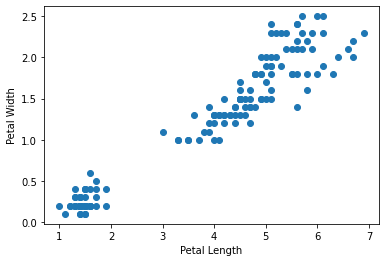

In [354]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

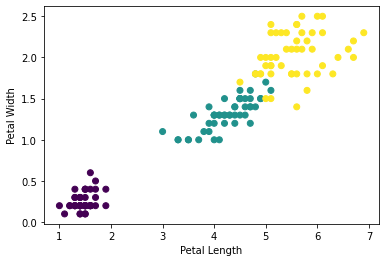

In [355]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [356]:
X = iris.data[:,[2,3]]
Y = iris.target

In [357]:
clf = tree.DecisionTreeClassifier(max_depth=2)

In [358]:
clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [359]:
clf.predict(np.array([[1,2]]))

array([0])

In [360]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


In [361]:
x_min, x_max

(0.0, 7.9)

In [362]:
y_min, y_max 

(-0.9, 3.5)

In [364]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

In [366]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 0. , -0.9],
       [ 0.1, -0.9],
       [ 0.2, -0.9],
       ...,
       [ 7.6,  3.4],
       [ 7.7,  3.4],
       [ 7.8,  3.4]])

In [367]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [368]:
Z

array([0, 0, 0, ..., 2, 2, 2])

Text(0, 0.5, 'Petal.Width')

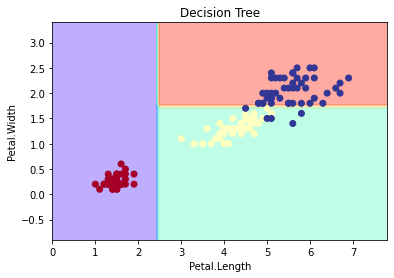

In [370]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')

In [371]:
tree.export_graphviz(clf, 'tree3.dot')

In [372]:
! cat tree3.dot

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 4 ;
}

In [373]:
pred_Y = clf.predict(X)

In [377]:
(pred_Y == Y).sum() / len(Y)

0.96

In [378]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, pred_Y)

0.96

In [379]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, pred_Y)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

## 邏輯式迴歸

In [380]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [382]:
X = iris.data[:, [2, 3]]
Y = iris.target
clf = LogisticRegression()
clf.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [383]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


In [384]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

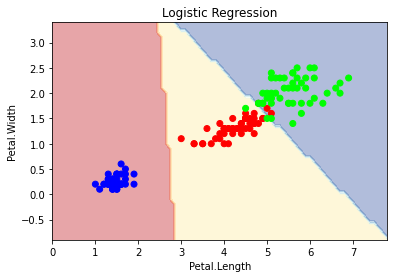

In [386]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap = plt.cm.brg)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

In [387]:
pred_Y = clf.predict(X)

In [388]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(Y , pred_Y)

0.9666666666666667

In [389]:
confusion_matrix(Y , pred_Y)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])